In [1]:
using Plots
plotlyjs()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10434198397677024251\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9978279760692048465\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10434198397677024251\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.PlotlyJSBackend()

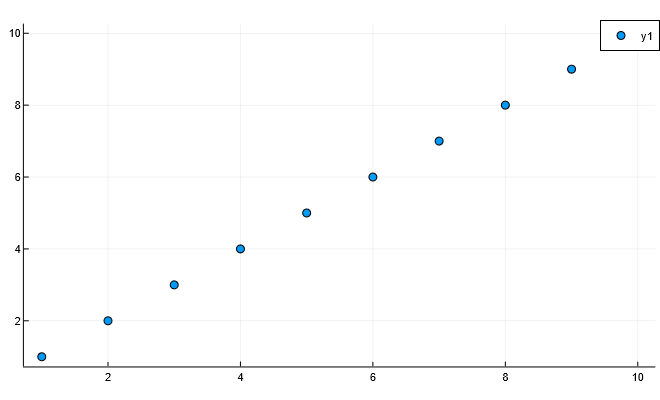

In [2]:
scatter(1:10)

In [3]:
include("../src/test.jl")

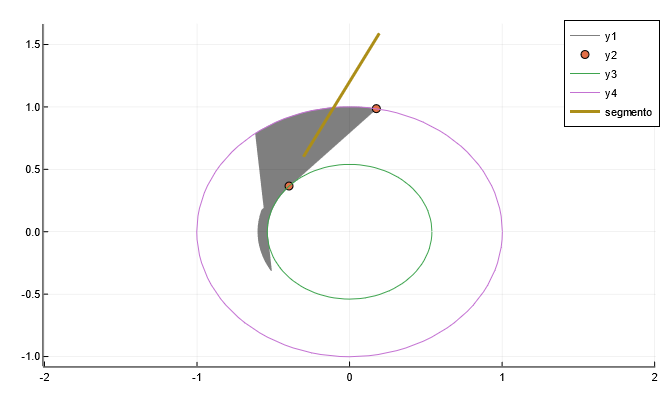

In [4]:
p = plot(aspect_ration=1)
q1 = Point(2*rand()-1,2*rand()-1,0.0) 
q2 = Point(2*rand()-1,2*rand()-1,0.0) 
theta = pi/2*rand()
plotRotation!(q1,q2,theta)
#p1 = -0.5*ey
#p2 = 1.5*ey
p1 = zrotation(theta/3)*q1
p2 = zrotation(theta/3)*q2
vp = p2 - p1
p1 = p1 + 0.6*vp
p2 = p2 + 0.6*vp
plotLine!(p1,p2,lw=3,label="segmento")
#xlims!(-3,3)
#ylims!(-3,3)
p

In [5]:
include("../src/simulations.jl")

randomSearch (generic function with 4 methods)

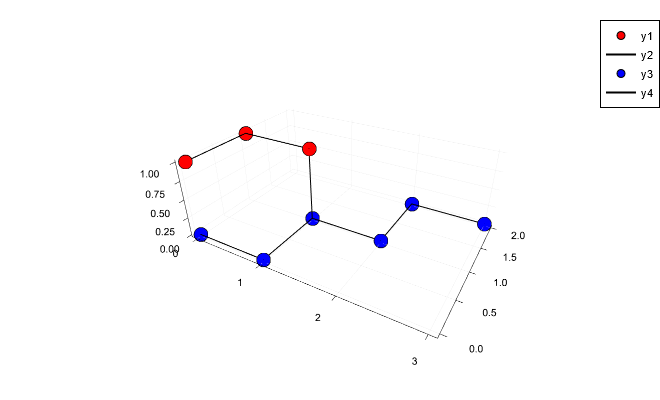

In [6]:
p1 = e0
p2 = ex
p3 = ex + ey
p4 = p3 + ez
p5 = p4 - ex
p6 = p5 - ey
points = [p1,p2,p3,p4,p5,p6]
#points = [p + 0.05*2*(Point()-(ex+ey+ez)) for p in points]
Q = stair(5)
#P = PolygonalChain2([p + 0.05*2*(Point()-(ex+ey+ez)) for p in points])
P = PolygonalChain2(points)
p = plot()
plotChain!(P,"red")
plotChain!(Q,"blue")

In [7]:
lastQ,angles_values,angles_indexes = randomSearch(P,Q,1e-1,pi/20,-pi/20)
changes = [i for i in 1:length(angles_indexes) if angles_indexes[i] != 0]

62-element Array{Int64,1}:
   2
   3
   6
   8
  10
  12
  17
  21
  22
  23
  24
  25
  26
   ⋮
 100
 101
 103
 104
 105
 106
 107
 109
 112
 116
 117
 118

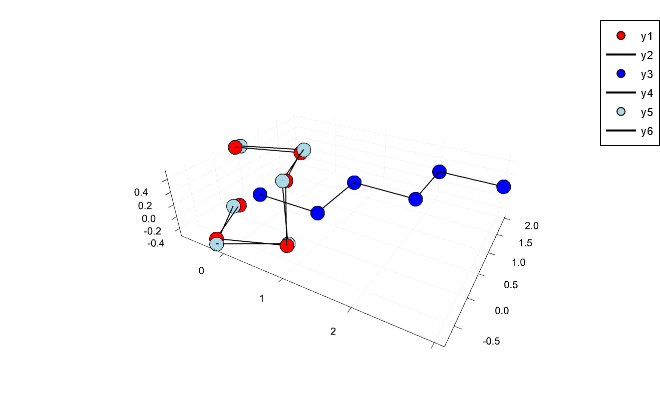

In [8]:
p = plot()
P = centerChain(P)
lastQ = centerChain(lastQ)
OR = optimalRotation(P,lastQ)
P = PolygonalChain2([OR*p for p in P.endpoints])
plotChain!(P,"red")
plotChain!(Q,"blue")
plotChain!(lastQ,"lightblue")
overlapedRmsd(P,lastQ)
p

In [26]:
aux = copy(Q)
anim = @animate for i in changes
    p = plot()
    plotChain!(aux,"blue")
    dihedralRotate!(aux,angles_indexes[i],angles_values[i])
    xlims!(0,2)
    ylims!(0,2)
    zlims!(0,2)
end
gif(anim,"basico.gif",fps=20)

1000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.01994249125615482
 0.0074681311495926744
 0.027881928788965622
 0.0
 0.0
 0.02067749015000138
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [57]:
plotlyjs()

Plots.PlotlyJSBackend()

In [9]:
l = 2
ep = 1/6
p0 = ex - ep*ey
p1 = rotate(ez,-pi/6,ex)
p2 = e0
p3 = ex
p4 = ex + ez
p5 = ep*ey
p0 = p1 + l*unitVector(p0-p1)
p5 = p4 + l*unitVector(p5-p4)
#p6 = p5 - ey
points = [p0,p1,p2,p3,p4,p5]
#points = [p + 0.05*2*(Point()-(ex+ey+ez)) for p in points]
#Q = stair(5)
#P = PolygonalChain2([p + 0.05*2*(Point()-(ex+ey+ez)) for p in points])
P = PolygonalChain2(points)
#p = plot()
#plotChain!(P,"red",3)
lenghts,bangles,dangles = lengthsAndAngles(P)
Q = PolygonalChain(lenghts,bangles,[pi for t in dangles])
Q = PolygonalChain2([p for p in Q.endpoints])
#plotChain!(Q,"blue")

PolygonalChain2(Point[Point(0.0, 0.0, 0.0), Point(1.9999999999999998, 0.0, 0.0), Point(1.268692864398084, 0.6820482925847123, 0.0), Point(1.9507411569827964, 1.413355428186628, 1.2246467991473535e-16), Point(1.2194340213808808, 2.0954037207713405, -4.930380657631324e-32), Point(3.217696397208621, 2.178755249559216, 5.207477146175737e-16)])

In [13]:
lastQ,angles_values,angles_indexes = randomSearch(P,Q,1e-1,pi/20,-pi/20)
changes = [i for i in 1:length(angles_indexes) if angles_indexes[i] != 0];

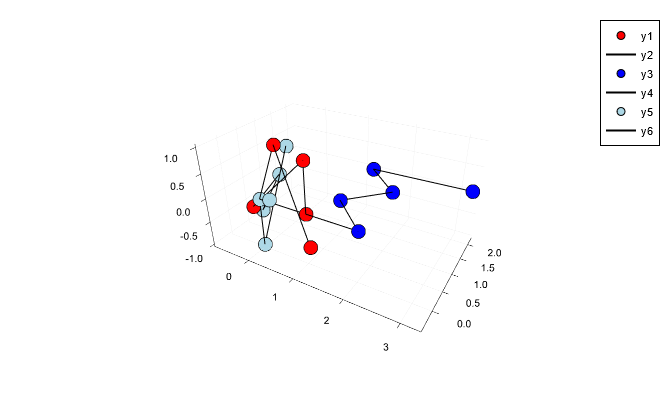

In [14]:
p = plot()
plotChain!(P,"red")
plotChain!(Q,"blue")
plotChain!(lastQ,"lightblue")

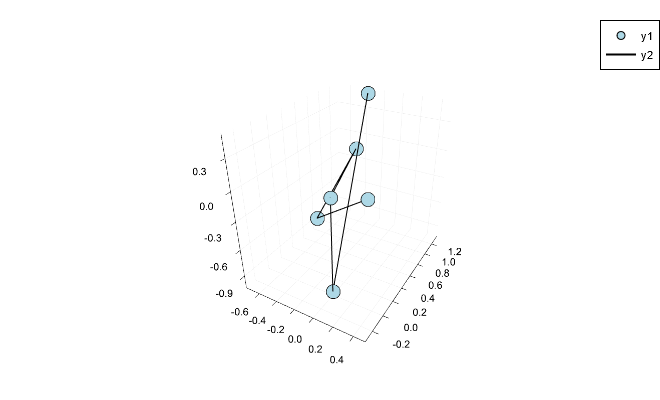

In [17]:
p = plot()
plotChain!(lastQ,"lightblue")

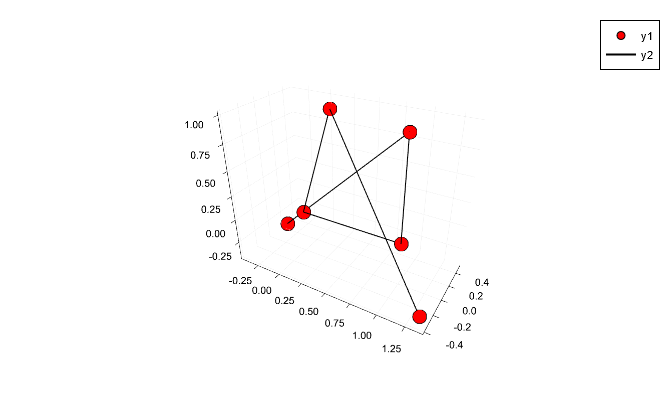

In [18]:
p = plot()
plotChain!(P,"red")

In [19]:
include("../src/io.jl")

saveSimulation (generic function with 1 method)

In [20]:
foldername = "prueba"
if !isdir(foldername)
    mkdir(foldername)
end
saveSimulation(joinpath(foldername,"l2"),P,Q,angles_values,angles_indexes)